In [1]:
import numpy as np              
import pandas as pd              
import yfinance as yf              
import matplotlib.pyplot as plt

In [2]:
start_date = "2023-01-01"             
end_date = "2023-02-11"             
df = yf.download(['GOOG', 'MSFT'], start=start_date, end=end_date)

C:\Users\e3plfmen\AppData\Local\Temp\1\ipykernel_54640\4279309995.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GOOG', 'MSFT'], start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed


In [3]:
df2 = df['Close']

<Axes: xlabel='Date'>

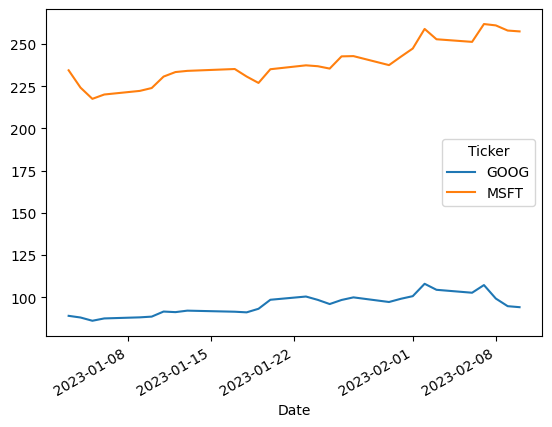

In [4]:
df2.plot.line()

<Axes: xlabel='Date'>

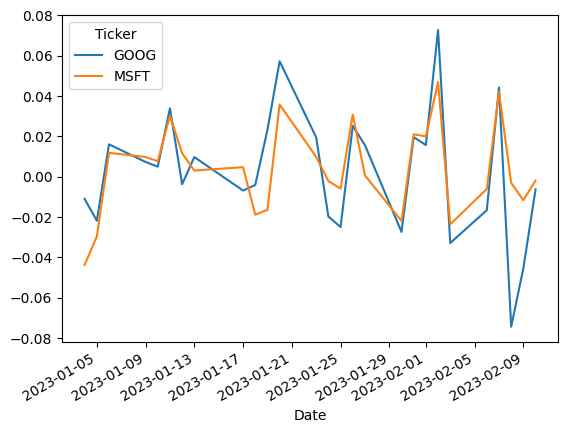

In [5]:
returns_df = df2.pct_change()
returns_df.plot.line()

<Axes: xlabel='Date'>

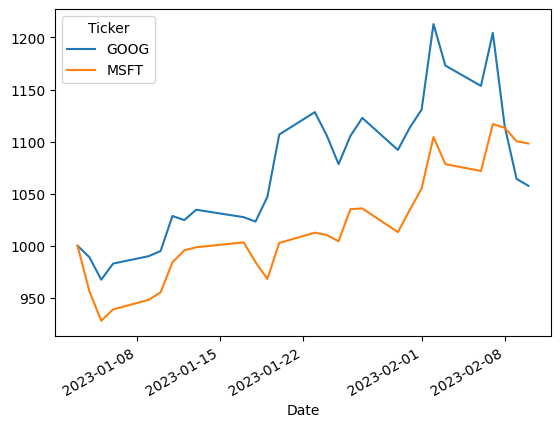

In [8]:
initial_wealth = 1_000
wealth_index_df = initial_wealth * (1 + returns_df).cumprod()
wealth_index_df.loc['2023-01-03'] = initial_wealth
wealth_index_df.plot.line()

<Axes: xlabel='Date'>

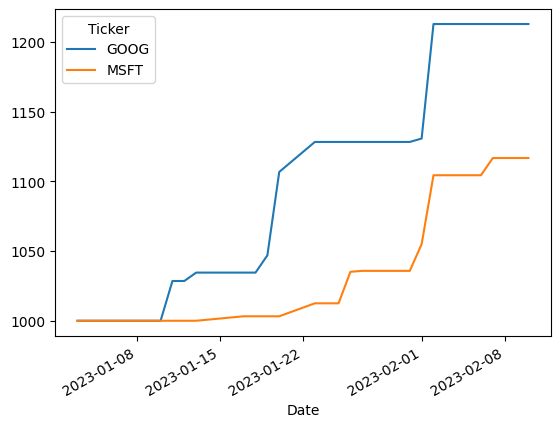

In [10]:
prior_peaks_df = wealth_index_df.cummax()
prior_peaks_df.plot.line()

<Axes: xlabel='Date'>

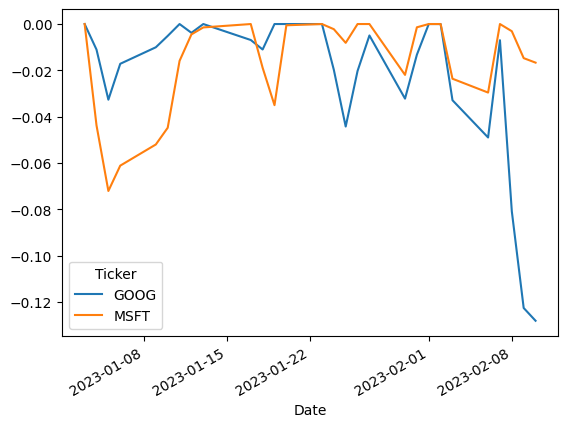

In [12]:
drawdown_df = (wealth_index_df - prior_peaks_df) / prior_peaks_df
drawdown_df.plot.line()

C:\Users\e3plfmen\AppData\Local\Temp\1\ipykernel_54640\2554122356.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_goog = yf.download(['GOOG'], start="2022-01-01", end="2023-01-01")['Close']
[*********************100%***********************]  1 of 1 completed


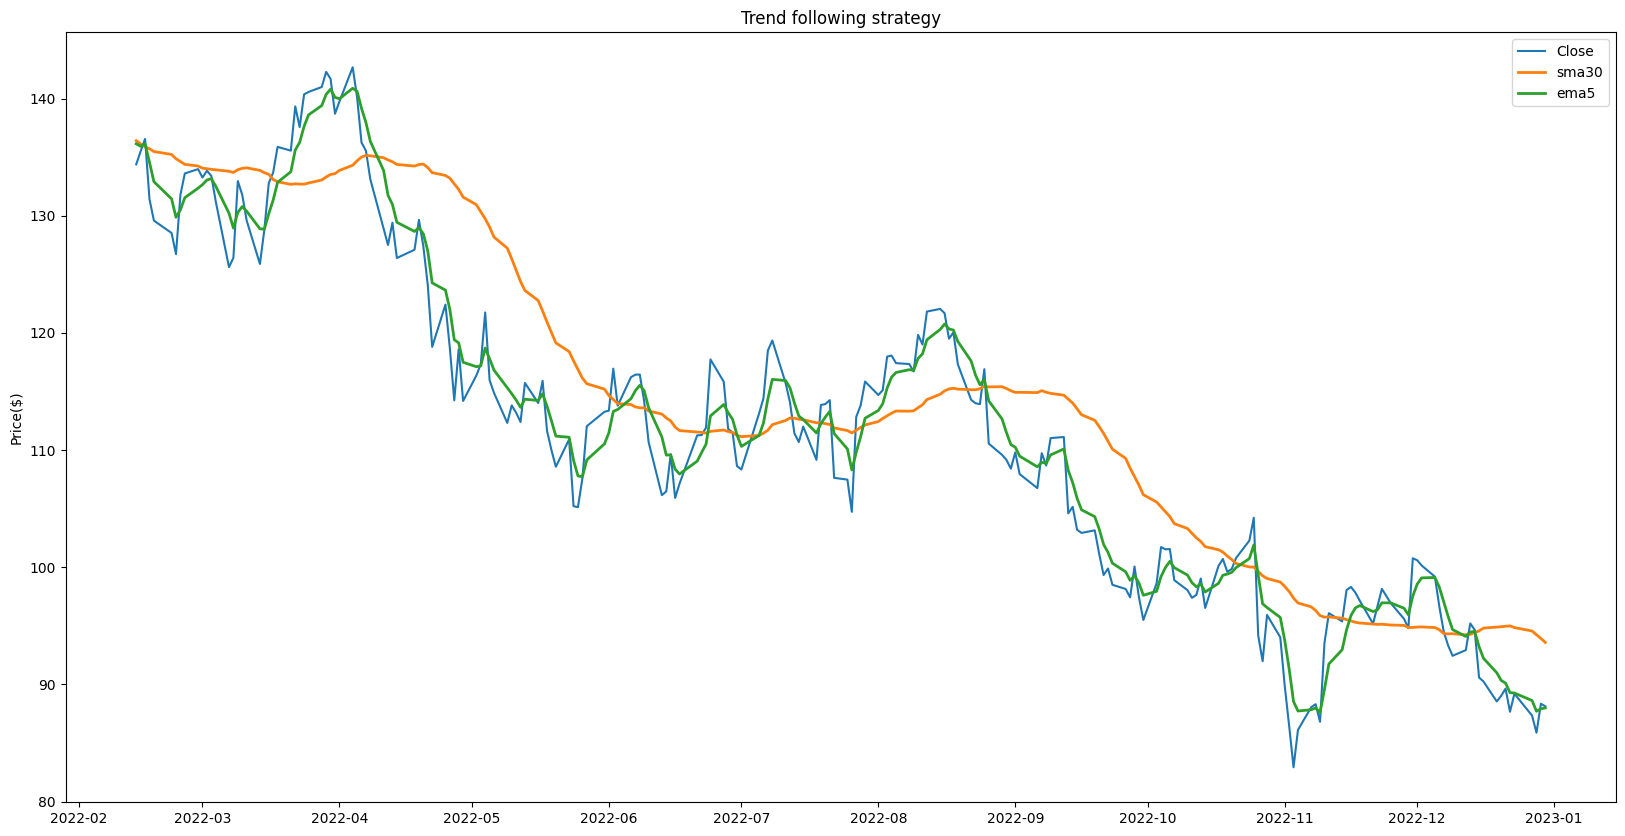

In [47]:
df_goog = yf.download(['GOOG'], start="2022-01-01", end="2023-01-01")['Close']              
df_goog = pd.DataFrame(df_goog)

sma_span = 30
ema_span = 5
short_ma = 'ema' + str(ema_span)
long_ma = 'sma' + str(sma_span)
df_goog[long_ma] = df_goog['GOOG'].rolling(sma_span).mean()
df_goog[short_ma] = df_goog['GOOG'].ewm(span=ema_span).mean()
df_goog.dropna(inplace=True)
df_goog

fig = plt.figure(figsize=(20, 10))
plt.plot(df_goog.index, df_goog['GOOG'], linewidth=1.5, label='Close')              
plt.plot(df_goog.index, df_goog[long_ma], linewidth=2, label=long_ma)              
plt.plot(df_goog.index, df_goog[short_ma], linewidth=2, label=short_ma)              
plt.title("Trend following strategy")              
plt.ylabel('Price($)')              
plt.legend()

In [50]:
df_goog['log_return_buy_n_hold'] = np.log(df_goog['GOOG'] / df_goog['GOOG'].shift(1))
# df_goog['log_return_buy_n_hold'] = np.log(df_goog['Adj Close']).diff() # same as above

In [51]:
# identify buy signal              
df_goog['signal'] = np.where(df_goog[short_ma] > df_goog[long_ma], 1, 0)
              
# identify sell signal              
df_goog['signal'] = np.where(df_goog[short_ma] < df_goog[long_ma], -1, df_goog['signal'])
              
df_goog.dropna(inplace=True)

df_goog

Ticker,GOOG,sma30,ema5,log_return_buy_n_hold,signal
Date,,,,,
2022-02-15,135.498245,136.115975,135.921410,0.008284,-1
2022-02-16,136.553024,135.886578,136.131948,0.007754,1
2022-02-17,131.409256,135.709623,134.557715,-0.038396,-1
2022-02-18,129.580750,135.475111,132.898725,-0.014012,-1
2022-02-22,128.522964,135.223432,131.440137,-0.008197,-1
...,...,...,...,...,...
2022-12-23,89.199585,94.845282,89.259407,0.017409,-1
2022-12-27,87.332367,94.553942,88.617061,-0.021155,-1
2022-12-28,85.872360,94.237111,87.702160,-0.016859,-1
